In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image


In [63]:
path = './abnormal_json_to_data/'
all_folders = os.listdir(path)

In [64]:
def crop_image(image):
    result = list()
    for y in range(12):
        for x in range(12):
            bbox = (x * 32, y * 32, x * 32 + 128, y * 32 + 128)
            result.append(np.array(image.crop(bbox)))
    return result

def load_label():
    origin = list()
    croped = list()
    for folder in all_folders:
        label = Image.open(path + folder + '/label.png')
        label = label.resize((512,512))
        crop = crop_image(label)
        origin.append(np.array(label))
        croped.append(np.array(crop))
    return np.array(origin), np.array(croped)

In [65]:
all_labels, all_croped_labels = load_label()

In [66]:
fo = open('all_labels.pkl', 'wb')
fc = open('all_croped_labels.pkl', 'wb')
pickle.dump(all_labels, fo)
pickle.dump(all_croped_labels, fc)
fo.close
fc.close

<function BufferedWriter.close>

In [67]:
fo = open('all_labels.pkl', 'rb')
fc = open('all_croped_labels.pkl', 'rb')
all_labels = pickle.load(fo)
all_croped_labels = pickle.load(fc)
fo.close
fc.close

print('all labels shape: {}'.format(all_labels.shape))
print('all croped labels shape: {}'.format(all_croped_labels.shape))

all labels shape: (51, 512, 512)
all croped labels shape: (51, 144, 128, 128)


In [68]:
def count_origin_segement_pixel(labels):
    result = list()
    for label in labels:
        pixels = len(label[label == 1])
        result.append(pixels)
    return np.array(result)

def count_croped_segement_pixel(lables):
    result = list()
    for label in lables:
        temp = list()
        for croped_label in label:
            pixels = len(croped_label[croped_label == 1])
            temp.append(pixels)
        result.append(np.array(temp))
    return np.array(result)

In [69]:
orig_segement_pixels =  count_origin_segement_pixel(all_labels)
croped_segement_pixels = count_croped_segement_pixel(all_croped_labels)
print('orig segement pixels: \n%s' %(orig_segement_pixels))
print('length: %s\n' %(len(orig_segement_pixels)))
print('croped segement pixels: \n%s' %(croped_segement_pixels))
print('length: %s' %(len(croped_segement_pixels)))

orig segement pixels: 
[ 8240 26782 14128 24448  4794 16403 16734  9339 22350  6142  5652 11842
 34645 14821  8437  3706  5083  8098  2766 34998 19197  7239  5419 41637
 19906  8669  5541 34845 14495 12504 29750 14261 18843 14360 36102  6028
 37764  5291  4577  6161 19593 36136 45950 16340 19091 16673  5722 29096
  6613  6948 41180]
length: 51

croped segement pixels: 
[[ 159 1008 1728 ...    0    0    0]
 [   0    0    0 ... 1125 1563 1450]
 [   0    0    0 ...  253  421  421]
 ...
 [  48  624 1656 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ... 1791 5108 9071]]
length: 51


In [70]:
orig_mean = np.mean(orig_segement_pixels)
orig_std = np.std(orig_segement_pixels)
orig_median = np.median(orig_segement_pixels)
croped_mean = np.mean(croped_segement_pixels)
croped_std = np.std(croped_segement_pixels)
croped_median = np.median(croped_segement_pixels)
print('orig mean: %0.3f' %(orig_mean))
print('orig std: %0.3f' %(orig_std))
print('orig median: %0.3f' %(orig_median))
print('croped mean: %0.3f' %(croped_mean))
print('croped std: %0.3f' %(croped_std))
print('croped median: %0.3f' %(croped_median))

orig mean: 16967.431
orig std: 11918.135
orig median: 14360.000
croped mean: 1387.639
croped std: 2778.338
croped median: 0.000


In [71]:
def size_classification(mean, std, pixels):
    result = {'small':list(), 'median':list(), 'large':list()}
    for i, pixel_num in enumerate(pixels):
        if(pixel_num < mean - std):
            result['small'].append(all_folders[i])
        elif(pixel_num > mean + std):
            result['large'].append(all_folders[i])
        else:
            result['median'].append(all_folders[i])
    return result

In [72]:
size_class = size_classification(orig_mean, orig_std, orig_segement_pixels)
print(size_class)

{'small': ['0001-I0000163', '0001-I0149605', '0001-I0149611', '0001-I0150641'], 'median': ['0001-I0000158', '0001-I0000159', '0001-I0000161', '0001-I0000162', '0001-I0000166', '0001-I0148852', '0001-I0148854', '0001-I0148855', '0001-I0148857', '0001-I0148858', '0001-I0148859', '0001-I0149599', '0001-I0149603', '0001-I0149607', '0001-I0149610', '0001-I0149616', '0001-I0149617', '0001-I0149618', '0001-I0149621', '0001-I0149622', '0001-I0149623', '0001-I0149625', '0001-I0149626', '0001-I0150631', '0001-I0150633', '0001-I0150635', '0001-I0150637', '0001-I0150639', '0001-I0150643', '0001-I0150644', '0001-I0150648', '1', '2', '3', '6', '8'], 'large': ['0001-I0148861', '0001-I0149614', '0001-I0149619', '0001-I0149624', '0001-I0150629', '0001-I0150636', '0001-I0150638', '0001-I0150645', '0001-I0150647', '5', '9']}


In [73]:
def count_img_num_by_pixel(pixels):
    reslut = dict()
    for pixel_num in pixels:
        img_num = reslut.get(pixel_num, 0)
        reslut[pixel_num] = img_num + 1
    return reslut
        
def count_corped_img_num_by_pixel(pixels):
    result = dict()
    for row in pixels:
        for element in row:
            img_num = result.get(element, 0)
            result[element] = img_num + 1
    return result


<BarContainer object of 51 artists>

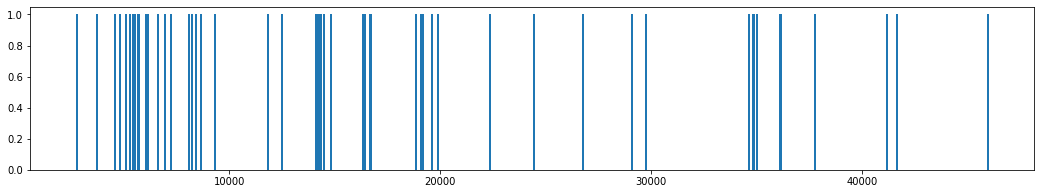

In [74]:
orig_statistic = count_img_num_by_pixel(orig_segement_pixels)
plt.subplots(figsize=(18,3))
plt.bar(orig_statstic.keys(), orig_statstic.values(),100)

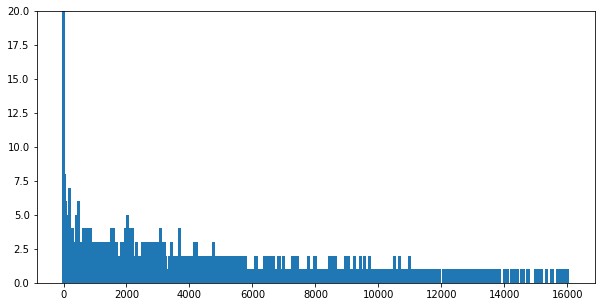

In [75]:
crop_statistic = count_corped_img_num_by_pixel(croped_segement_pixels)
plt.subplots(figsize=(10,5))
plt.ylim(0,20)
plt.bar(crop_statstic.keys(), crop_statstic.values(), 100)